In [3]:
# Load libraries
import seaborn
import pandas
from sklearn import tree
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve



In [2]:
dataset = pandas.read_csv("unplugged.csv")
dataset.sample(frac=1)
dataset = dataset[0:360]
del dataset['Comments']


NameError: name 'pandas' is not defined

In [3]:
print(dataset.head(300))

     School Name           Student Name  Age Gender Results_Before  \
0      IMSJ G9-2                 Anthny   12      M              F   
1      IMSJ G9-2            Farhana Ali   10      F              F   
2      IMSJ G9-2              Samiullah   10      M              F   
3      IMSJ G9-2                  Uzair   12      M              F   
4      IMSJ G9-2                  Sarim    8      M              P   
5      IMSJ G9-2              M. Sohaib   12      M              F   
6      IMSJ G9-2                  Laiba    8      F              F   
7      IMSJ G9-2              Isha Khan    9      F              F   
8      IMSJ G9-2            Ayesha Ayaz    9      F              F   
9      IMSJ G9-2           Rubab Khalid   10      F              F   
10     IMSJ G9-2            Umme Habiba   10      F              F   
11     IMSJ G9-2            Hifza Qasar   10      F              F   
12     IMSJ G9-2            Fariha Noor    9      F              P   
13           NaN    

In [4]:
print(dataset.shape)

(360, 9)


In [5]:
# dataset = dataset.drop('Id',axis=1)

In [6]:



gender = {'M': 1, 'F': 2}
dataset.Gender = [gender[item] for item in dataset.Gender]

before = {'F': 0, 'P': 1}
dataset.Results_Before   = [before[item] for item in dataset.Results_Before]


print(dataset.describe())

dataset =  dataset[['Age', 'Gender', 'Class', 'Results_Before', 'Results_After']]

              Age      Gender  Results_Before       Class
count  360.000000  360.000000      360.000000  360.000000
mean     9.616667    1.630556        0.391667    4.052778
std      1.287502    0.483326        0.488802    0.619995
min      7.000000    1.000000        0.000000    3.000000
25%      9.000000    1.000000        0.000000    4.000000
50%     10.000000    2.000000        0.000000    4.000000
75%     10.000000    2.000000        1.000000    4.000000
max     14.000000    2.000000        1.000000    5.000000


In [7]:
# print(dataset.head(300))

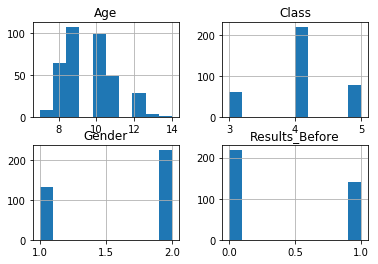

In [8]:
dataset.hist()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
array = dataset.values
X = array[:,0:4]
Y = array[:,4:]
test_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, 
random_state=seed, stratify = dataset['Results_After'])

In [10]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'
models = []

models.append(('DT', DecisionTreeClassifier()))

# evaluate each model in turn
results = []
names = []

In [11]:
import sklearn
for name, model in models:
	kfold = sklearn.model_selection.KFold(n_splits=10,shuffle=True, random_state=5)
	cv_results = sklearn.model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

DT: 0.736084 (0.099185)


In [12]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)
print(str(accuracy_score(Y_test, predictions)*100)+'%')

76.38888888888889%


AUC: 0.602


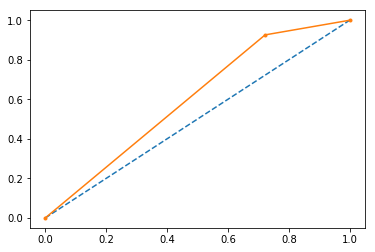

In [13]:

testy = []
probsy = [] 
probs = predictions[:]
for i in range(len(probs)):
    if (probs[i] == 'F'):
        probsy.append(0)
    else:
        probsy.append(1)
#     print(i)
for i in range(len(Y_test)):
    if (Y_test[i][0] == 'F'):
        testy.append(0)
    else:
        testy.append(1)
#     print (i)
# calculate AUC
auc = roc_auc_score(testy, probsy)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probsy)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [14]:
print(confusion_matrix(Y_test, predictions))

[[ 5 13]
 [ 4 50]]


In [15]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           F       0.56      0.28      0.37        18
           P       0.79      0.93      0.85        54

   micro avg       0.76      0.76      0.76        72
   macro avg       0.67      0.60      0.61        72
weighted avg       0.73      0.76      0.73        72



In [16]:
# #Precision
# precision = precision_score((Y_test), predictions, average=None)
# print("Precision", str(precision))

# #recall
# recall = recall_score((Y_test), predictions, average=None)
# print("Recall : ", str(recall))

# #f-score
# f_score = f1_score((Y_test), predictions, average=None)
# print("F Score : " + str(f_score))


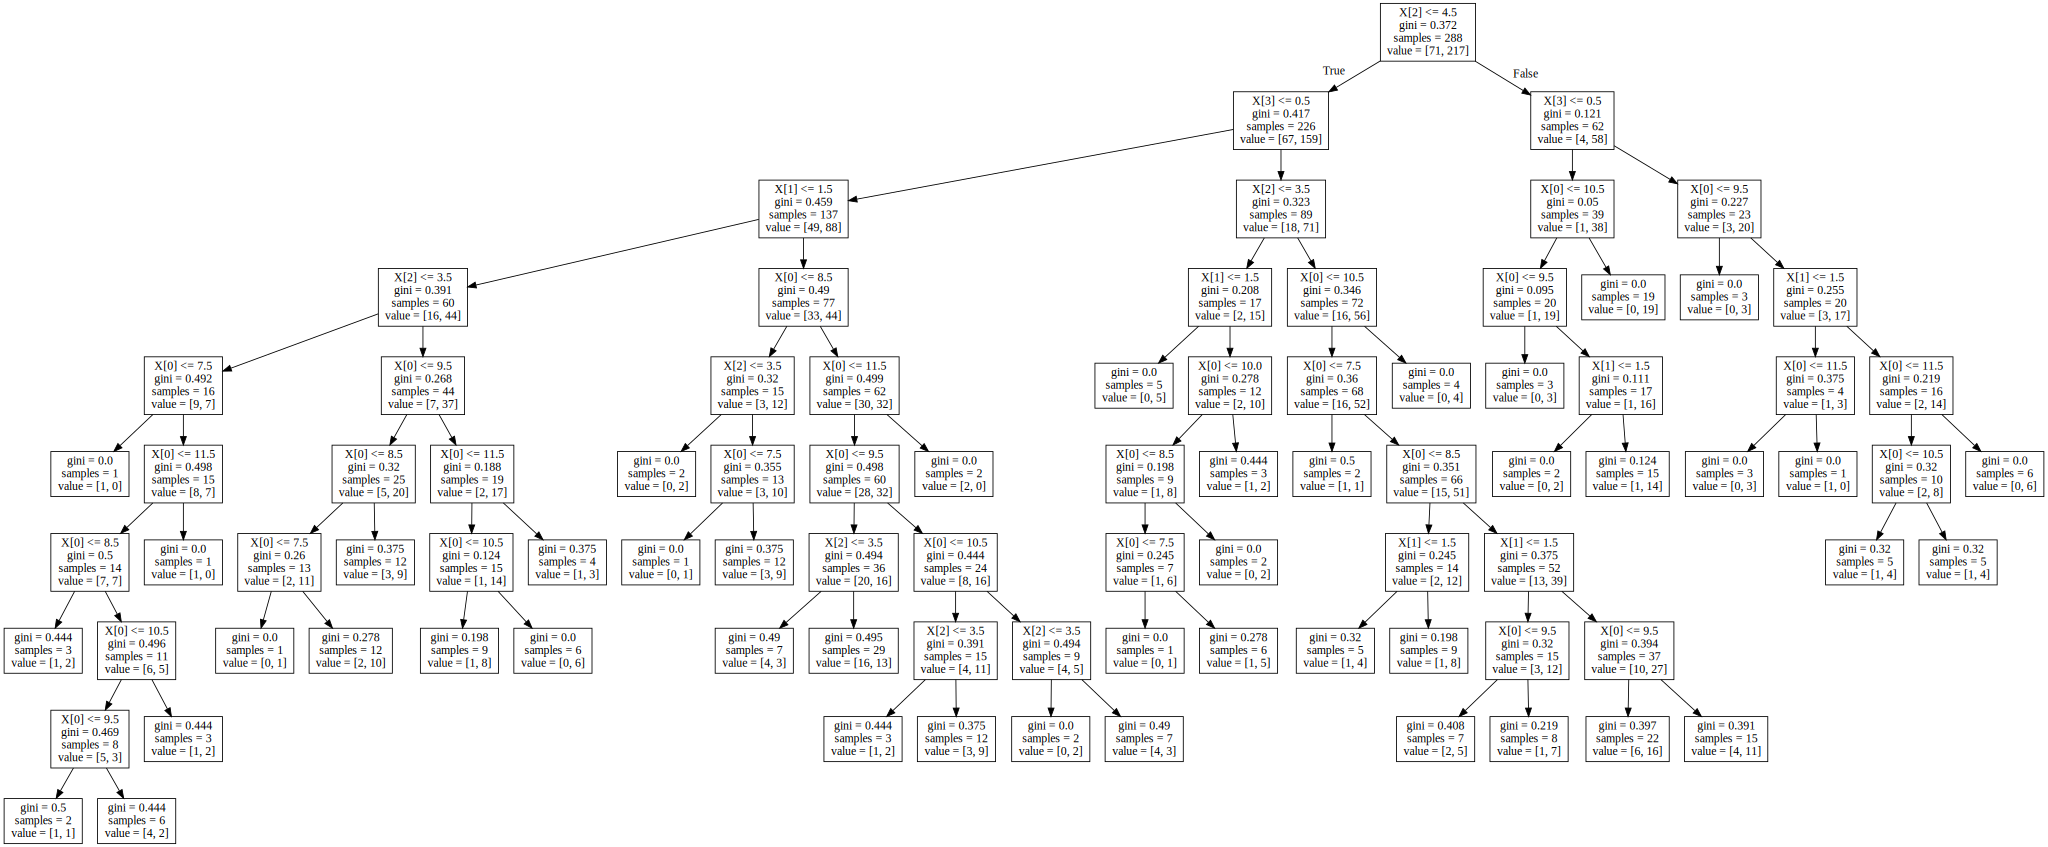

In [17]:

dot_data = tree.export_graphviz(clf, out_file=None,
#                      feature_names=vectorizer.get_feature_names(),
                     class_names=["0", "1"],
                     filled=True, rounded=True,
                     special_characters=True)

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("RanderedDT_After")
graph

# Random Dataset

In [17]:
dataset = pandas.read_csv("random_dataset.csv")
dataset.sample(frac=1)
# del dataset['Comments']

,Age,Gender,Results_Before,Results_After,Class,Positive Outcomes
2171,9,M,F,F,5,F
1967,13,M,P,P,5,F
1285,8,F,P,F,3,F
3615,8,M,F,P,5,T
954,12,F,F,F,3,F
3443,7,M,F,F,5,F
2236,9,F,P,P,5,F
3274,11,M,P,P,3,F
4596,8,F,P,F,4,F
1529,11,F,F,P,3,T


In [18]:
print(dataset.head(10))

   Age Gender Results_Before Results_After  Class Positive Outcomes
0   12      F              P             P      4                 F
1   11      M              F             P      5                 T
2   11      M              F             P      3                 T
3   14      F              P             P      4                 F
4   14      M              P             F      3                 F
5   14      F              F             P      4                 T
6    9      F              P             F      3                 F
7   11      F              F             P      5                 T
8   12      F              F             F      4                 F
9   12      M              P             P      4                 F


In [19]:
gender = {'M': 1, 'F': 2}
dataset.Gender = [gender[item] for item in dataset.Gender]

before = {'F': 0, 'P': 1}
dataset.Results_Before   = [before[item] for item in dataset.Results_Before]


print(dataset.describe())

dataset =  dataset[['Age', 'Gender', 'Class', 'Results_Before', 'Results_After']]

               Age       Gender  Results_Before        Class
count  5000.000000  5000.000000     5000.000000  5000.000000
mean     10.493400     1.492000        0.493600     4.017800
std       2.280394     0.499986        0.500009     0.817323
min       7.000000     1.000000        0.000000     3.000000
25%       9.000000     1.000000        0.000000     3.000000
50%      10.000000     1.000000        0.000000     4.000000
75%      12.000000     2.000000        1.000000     5.000000
max      14.000000     2.000000        1.000000     5.000000


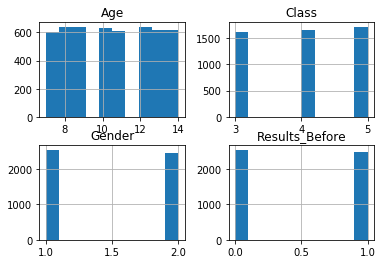

In [20]:
dataset.hist()
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
array = dataset.values
X = array[:,0:4]
Y = array[:,4:]
test_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, 
random_state=seed, stratify = dataset['Results_After'])

In [22]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'
models = []

models.append(('DT', DecisionTreeClassifier()))

# evaluate each model in turn
results = []
names = []

In [23]:
import sklearn
for name, model in models:
	kfold = sklearn.model_selection.KFold(n_splits=10,shuffle=True, random_state=5)
	cv_results = sklearn.model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

DT: 0.497250 (0.013622)


In [24]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)
print(str(accuracy_score(Y_test, predictions)*100)+'%')

46.6%


AUC: 0.465


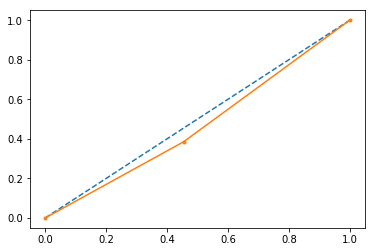

In [25]:

testy = []
probsy = [] 
probs = predictions[:]
for i in range(len(probs)):
    if (probs[i] == 'F'):
        probsy.append(0)
    else:
        probsy.append(1)
#     print(i)
for i in range(len(Y_test)):
    if (Y_test[i][0] == 'F'):
        testy.append(0)
    else:
        testy.append(1)
#     print (i)
# calculate AUC
auc = roc_auc_score(testy, probsy)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probsy)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [26]:
print(confusion_matrix(Y_test, predictions))

[[275 229]
 [305 191]]


In [27]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           F       0.47      0.55      0.51       504
           P       0.45      0.39      0.42       496

   micro avg       0.47      0.47      0.47      1000
   macro avg       0.46      0.47      0.46      1000
weighted avg       0.46      0.47      0.46      1000



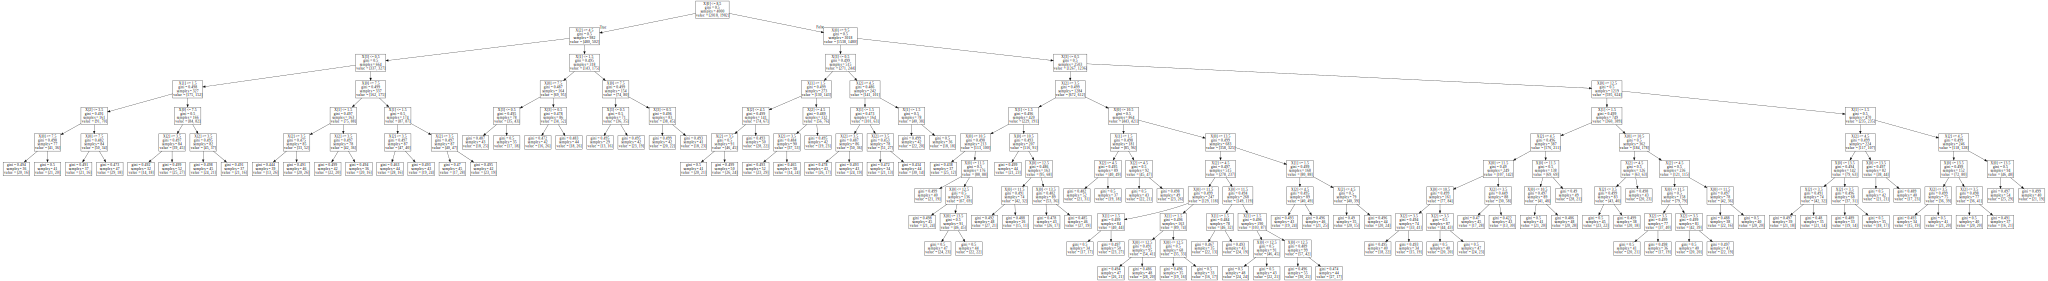

In [28]:

dot_data = tree.export_graphviz(clf, out_file=None,
#                      feature_names=vectorizer.get_feature_names(),
                     class_names=["0", "1"],
                     filled=True, rounded=True,
                     special_characters=True)

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("RandoredDT_After")
graph